In [1]:
import matplotlib
matplotlib.use('TkAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', 100)

In [2]:
mst_path = '/Users/amywatt1/Desktop/bikes/BikeSGV/datasets/mst/'
fig_path = '/Users/amywatt1/Desktop/bikes//BikeSGV/export/02_summary_stats_ped/'

In [3]:
df = pd.read_csv(mst_path + 'clean_bike.csv')
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
2,19205.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
3,19206.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,2,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,2,0,0
4,19207.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0,0


Explore the data types of each column. Notice that the time column "date" is of type "object". Let's change that to datetime 

In [4]:
df.dtypes['date']

dtype('O')

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes['date']

dtype('<M8[ns]')

In [6]:
# Observe that there are some nan values in the column date. We drop these rows
print("Number of nans in the date column:", df.isnull().sum()['date'])
df = df.dropna(subset = ['date'])
df.index = range(len(df))
df.shape

Number of nans in the date column: 16


(2608, 34)

In [7]:
# Explore the number of observations per year_month combinatino for the dataset
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: int(x.year))
df['yr_mo'] = [str(a)+'-'+str(b) for a,b in zip(df['year'], df['month'])]
df['yr_mo'].value_counts()

2017-4     528
2017-6     280
2017-5     256
2016-4     240
2016-5     208
2016-12    208
2016-10    184
2017-1     144
2017-3     136
2017-2     120
2016-11    112
2016-9      56
2017-7      56
2016-8      24
2018-7      24
2018-1      24
2017-8       8
Name: yr_mo, dtype: int64

It seems that 2017-01 to 2017-06 has most of the data points, so we focus on this period only. Note that you can totally make other assumptions and subset the data in another way! This is just what I am doing here.

In [8]:
# Subset the data for only this time range:
time_range = ['2017-' + str(i) for i in range(1,7)]
print("time_range", time_range)

# Subset the data and check how many obs. are left
df = df[df['yr_mo'].isin(time_range)]
df.shape

time_range ['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6']


(1464, 37)

# Temporal Trends of One Variable

In [9]:
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child,month,year,yr_mo
1640,19034.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,11:00 AM,5,0,0,0,0,2,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,5,2,0,4,2017,2017-4
1641,19035.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,0,0,0,4,2017,2017-4
1642,19036.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,11:30 AM,1,0,0,0,0,1,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,1,1,0,4,2017,2017-4
1643,19037.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,11:45 AM,1,1,0,0,1,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,2,1,0,4,2017,2017-4
1644,19038.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,0,0,0,4,2017,2017-4
1645,19039.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,12:15 PM,1,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,1,1,1,4,2017,2017-4
1646,19040.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,12:30 PM,1,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,1,0,0,4,2017,2017-4
1647,19041.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-04-01,Saturday,11:00 AM,1:00 PM,12:45 PM,1,0,0,0,0,1,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:38:00,1,1,0,4,2017,2017-4
1648,19026.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-05-11,Thursday,4:00 PM,6:00 PM,4:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:34:00,0,0,0,5,2017,2017-5
1649,19027.0,1591.0,1st St,Wheeler,Huntington,34.140447,-118.028441,2017-05-11,Thursday,4:00 PM,6:00 PM,4:15 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,majorCollector,25.0,neighborhoodRetail,143.0,Arcadia,2017-07-05 15:34:00,0,0,0,5,2017,2017-5


# Trends for different weekdays:

In [10]:
weekday = df.groupby(['city', 'weekday']).agg(['sum', 'mean', 'count'])['total_count'].reset_index()
weekday['weekday_num'] = weekday['weekday'].replace({'Tuesday':0, 'Thursday':1, 'Saturday':2})
#drop any rows with fewer than 23 observations
weekday = weekday.loc[weekday['count'] > 23]
weekday.head()

,city,weekday,sum,mean,count,weekday_num
0,Altadena,Saturday,80,1.666667,48,2
1,Altadena,Thursday,70,1.250000,56,1
2,Altadena,Tuesday,59,1.475000,40,0
3,Arcadia,Saturday,134,3.350000,40,2
4,Arcadia,Thursday,31,1.291667,24,1


In [11]:
weekday = weekday.sort_values(by=['city', 'weekday_num'])

In [12]:
cities_dict = {}
cities = []
for city in weekday["city"]:
    if city in cities_dict.keys():
        cities_dict[city] = cities_dict[city] + 1
    else:
        cities_dict[city] = 1
        
for key in cities_dict.keys():
    if cities_dict[key] == 3:
        cities.append(key)

print (cities)

['Altadena', 'Arcadia', 'Pomona', 'Duarte', 'Rowland Heights']


Text(0.5, 1.0, 'Average Total Count by Day of Week')

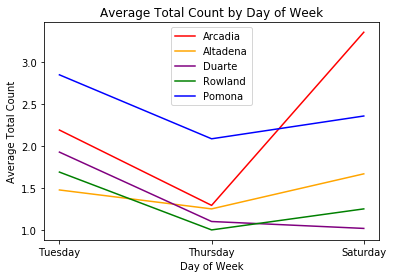

In [13]:
Arcadia = weekday.loc[weekday['city'] == 'Arcadia']
Altadena = weekday.loc[weekday['city'] == 'Altadena']
Duarte = weekday.loc[weekday['city'] == 'Duarte']
Rowland = weekday.loc[weekday['city'] == 'Rowland Heights']
Pomona = weekday.loc[weekday['city'] == 'Pomona']

%matplotlib inline
plt.plot(Arcadia['weekday'], Arcadia['mean'], color = 'red', label = 'Arcadia')
plt.plot(Altadena['weekday'], Altadena['mean'], color = 'orange', label = 'Altadena')
plt.plot(Duarte['weekday'], Duarte['mean'], color = 'purple', label = 'Duarte')
plt.plot(Rowland['weekday'], Rowland['mean'], color = 'green', label = 'Rowland')
plt.plot(Pomona['weekday'], Pomona['mean'], color = 'blue', label = 'Pomona')
plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Average Total Count')
plt.title("Average Total Count by Day of Week")

Each observation represents the average number of bike riders in a particular location within a 15-minute interval. For each city and weekday on which observations were recorded, the average number of bikers seen in a 155-minute interval was calculated. Only cities with at least 8 15-minute observations per each of the three weekdays during 1/2017 to 6/2017 were included in this analysis. 

For the represented cities, there is a characteritic dip in the average number of bikers on Thursday, and a large increase on Saturday in Arcadia and a small increase on Saturday in the other cities. Because biking decreases later on during the week consistently across all cities, programs designed to encourage biking should emphasize continuing to use biking as a mode of transport in the latter parts of the week. It is possible that people get tired later on the week, causing the decrease in biking but further research is needed to test this hypothesis. Because biking is very popular in Arcadia on Saturday, safety measures such as crossing guards should be implemented on Saturday. 

#  Trends for diffent time periods

In [14]:
#trends for different time periods
city = df.groupby(['city', 'period_begin', 'period_end']).agg(['sum', 'mean', 'count'])['total_count'].reset_index()
city = city.loc[city['count'] > 23]
city['time_num'] = city['period_begin'].replace({'7:00 AM':0, '11:00 AM':1, '4:00 PM':2})
city = city.sort_values(by=['city', 'time_num'])

In [15]:
cities_dict = {}
cities = []
for c in city["city"]:
    if c in cities_dict.keys():
        cities_dict[c] = cities_dict[c] + 1
    else:
        cities_dict[c] = 1
        
for key in cities_dict.keys():
    if cities_dict[key] == 3:
        cities.append(key)

print (cities)

['Altadena', 'Temple City', 'Arcadia', 'E. Pasadena', 'Pomona', 'Baldwin Park', 'Duarte', 'Mt. SAC/Cal Poly/Walnut', 'Rowland Heights']


Text(0.5, 0, 'Period Begin')

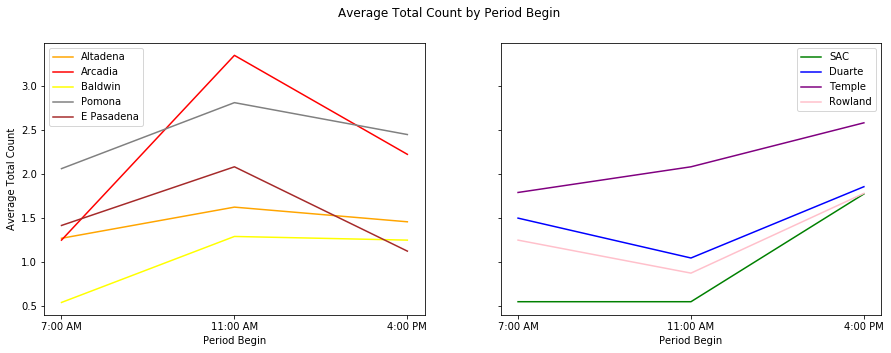

In [16]:
Arcadia = city.loc[city['city'] == 'Arcadia']
Altadena = city.loc[city['city'] == 'Altadena']
Baldwin = city.loc[city['city'] == 'Baldwin Park']
SAC = city.loc[city['city'] == 'Mt. SAC/Cal Poly/Walnut']
Duarte = city.loc[city['city'] == 'Duarte']
Temple = city.loc[city['city'] == 'Temple City']
Rowland = city.loc[city['city'] == 'Rowland Heights']
Pomona = city.loc[city['city'] == 'Pomona']
EPasadena = city.loc[city['city'] == 'E. Pasadena']

%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
f.suptitle('Average Total Count by Period Begin')
ax1.plot(Altadena['period_begin'], Altadena['mean'], color = 'orange', label = 'Altadena')
ax1.plot(Arcadia['period_begin'], Arcadia['mean'], color = 'red', label = 'Arcadia')
ax1.plot(Baldwin['period_begin'], Baldwin['mean'], color = 'yellow', label = 'Baldwin')
ax1.plot(Pomona['period_begin'], Pomona['mean'], color = 'grey', label = 'Pomona')
ax1.plot(EPasadena['period_begin'], EPasadena['mean'], color = 'brown', label = 'E Pasadena')
ax1.legend()
ax1.set_xlabel('Period Begin')
ax1.set_ylabel('Average Total Count')
ax2.plot(SAC['period_begin'], SAC['mean'], color = 'green', label = 'SAC')
ax2.plot(Duarte['period_begin'], Duarte['mean'], color = 'blue', label = 'Duarte')
ax2.plot(Temple['period_begin'], Temple['mean'], color = 'purple', label = 'Temple')
ax2.plot(Rowland['period_begin'], Rowland['mean'], color = 'pink', label = 'Rowland')
ax2.legend()
ax2.set_xlabel('Period Begin')


Each observation represents the average number of bike riders in a particular location within a 15-minute interval. Observation periods last two hours (8 obeservations per period), and begin at 7AM, 11AM, or 4PM and end at 9AM, 1PM, and 6PM respectively. For each city and time at which observations began, the average number of bikers seen in a 15-minute interval was calculated. Only cities with at least 8 15-minute observations per each of the three weekdays during 1/2017 to 6/2017 were included in this analysis. 

Two trends emerge. Half of the cities see an increase in bikers during the 11AM to 1PM period, and the other half of cities see relatively stable average total count of bikers in the 7AM and 11AM periods and see an increase for the 4PM periods. This shows different trends in what times of day are most popular. For the first group of cities, increased bike safety measures, such as crossing guards, are more effective from 11am to 1pm. Fir the second group of cities, increased bike safety measures are more effective from 4pm to 6pm. Additionally, because it tends to get dark outside around 5pm in the winter, it is important to encourage bikers to use reflective gear. BikeSGV may want to start a program to provide bikers during the 4pm to 6pm interval free or subsidized reflective equiptment to enhance safety. 

In [17]:
#locations with the highest number of average bikers passing through
location = df.groupby(['location_id', 'city']).agg(['sum', 'mean', 'count'])['total_count'].reset_index()
location = location.sort_values('mean', ascending = False).reset_index()
location.head()

,index,location_id,city,sum,mean,count
0,5,1545.0,SEM,36,4.500000,8
1,37,1607.0,Pasadena,36,4.500000,8
2,31,1600.0,Arcadia,98,4.083333,24
3,52,1620.0,Azusa,88,3.666667,24
4,30,1599.0,Arcadia,77,3.208333,24


In [18]:
print(location[19:20])

    index  location_id             city  sum  mean  count
19     65       1633.0  Rowland Heights   48   2.0     24


In [19]:
cities_dict = {}
for c in location["city"][:20]:
    if c in cities_dict.keys():
        cities_dict[c] = cities_dict[c] + 1
    else:
        cities_dict[c] = 1

cities_dict

{'Altadena': 2,
 'Arcadia': 2,
 'Azusa': 1,
 'Duarte': 2,
 'La Verne': 1,
 'Pasadena': 1,
 'Pomona': 4,
 'Rowland Heights': 2,
 'SEM': 2,
 'Temple City': 3}

In [20]:
all_cities_dict_temp = {}
for c in location["city"]:
    if c in all_cities_dict_temp.keys():
        all_cities_dict_temp[c] = all_cities_dict_temp[c] + 1
    else:
        all_cities_dict_temp[c] = 1
        
all_cities_dict = {}
all_cities_dict_excluded = {}
for entry in all_cities_dict_temp:
    if entry in cities_dict.keys():
        all_cities_dict[entry] = all_cities_dict_temp[entry]
    else:
        all_cities_dict_excluded[entry] = all_cities_dict_temp[entry]
    
for entry in all_cities_dict_excluded:
    cities_dict[entry] = 0
cities_dict

{'Altadena': 2,
 'Arcadia': 2,
 'Azusa': 1,
 'Baldwin Park': 0,
 'Claremont': 0,
 'Covina': 0,
 'Duarte': 2,
 'E. Pasadena': 0,
 'Hacienda Height': 0,
 'Irwindale': 0,
 'La Puente': 0,
 'La Verne': 1,
 'Mt. SAC/Cal Poly/Walnut': 0,
 'Pasadena': 1,
 'Pomona': 4,
 'Rowland Heights': 2,
 'S. Pasadena': 0,
 'SEM': 2,
 'San Diamas': 0,
 'Temple City': 3,
 'West Covina': 0}

In [21]:
c = []
perc = []
num_locations = []
top_20 = []
not_top_20 = []
for key in cities_dict:
    c.append(key)
    perc.append(cities_dict[key]/all_cities_dict_temp[key])
    num_locations.append(all_cities_dict_temp[key])
    top_20.append(cities_dict[key])
    not_top_20.append(all_cities_dict_temp[key]-cities_dict[key])

In [26]:
d = {'city': c, 'num locations': num_locations, 'top 20': top_20, 'not top 20':not_top_20, 'perc':perc}
df = pd.DataFrame(data=d)
df.sort_values(by = ['num locations'])
df.head()

,city,not top 20,num locations,perc,top 20
0,Altadena,4,6,0.333333,2
1,Covina,3,3,0.000000,0
2,Hacienda Height,2,2,0.000000,0
3,Irwindale,1,1,0.000000,0
4,Baldwin Park,3,3,0.000000,0


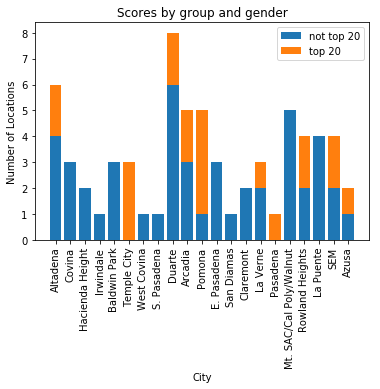

In [23]:
p1 = plt.bar(df["city"], df["not top 20"])
p2 = plt.bar(df["city"], df["top 20"], bottom = df["not top 20"])
plt.xlabel('City')
plt.ylabel('Number of Locations')
plt.xticks(rotation = 90)
plt.title('Scores by group and gender')
plt.legend((p1[0], p2[0]), ('not top 20', 'top 20'))

plt.show()

Each observation represents the average number of bike riders in a particular location within a 15-minute interval. For each location, the average number of bikers seen in a 15-minute interval was calculated during 1/2017 to 6/2017. There are 67 locations at which observations were taken, and the top 20 locations saw an overall average of 2 bikers for a 15-minute interval. The total number of locations in each city are graphed, with orange indicating the number of locations that are in the top 20. 

This shows that Temple City and Pomona both have the vast majority of their locations within the top 20 average total bikers. Other cities with multiple locations in the top 20 are SEM, Arcadia, Rowland Heights, Altadena, and Duarte. This analysis does not take into account whether locations are on major streets/intersections, or on quiter neighborhood streets, which could affect results. This gives insight into which cities have more biciclists. 